<a href="https://colab.research.google.com/github/shwetapal09/PRODIGY_INFOTECH-ML/blob/main/mallcustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing required libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
#reading the dataset
data=pd.read_csv("/content/drive/MyDrive/datasets/Mall_Customers.csv")

In [16]:
#printing first five instances
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
#printing las five instances
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [18]:
# Summary statistics of the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
#checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
#datapreprocessing:features selection
X=data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

#**visualize the Data Points**

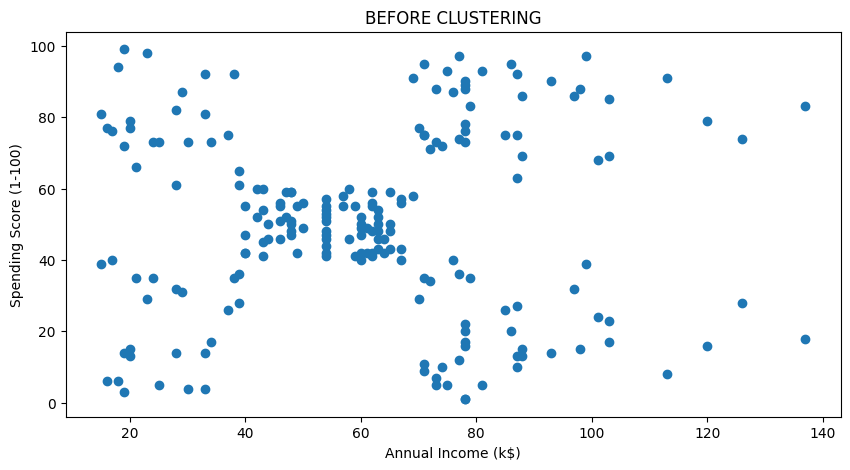

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1])
plt.title("BEFORE CLUSTERING")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# **find the K value using the Elbow method**

**WCSS (within-cluster sum of squares) is a measure of how well the data points are grouped in K-means.**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

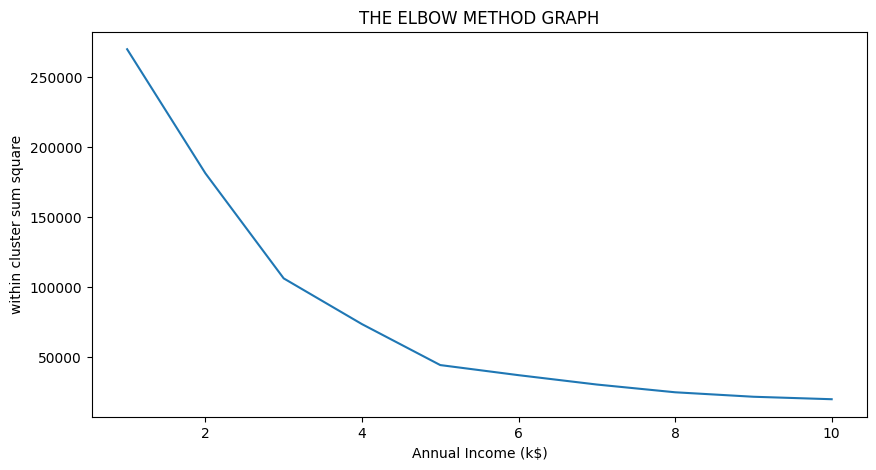

In [23]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title("THE ELBOW METHOD GRAPH")
plt.xlabel("Annual Income (k$)")
plt.ylabel("within cluster sum square")
plt.show()

**Wcss doesn't reduce much after k=5. So we can choose 5 as the perfect k value or clusters**

In [24]:
#Training the K-Means algorithm on the training dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **centroid points**

In [25]:
k_center=kmeans.cluster_centers_
print(k_center)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


# **visualize the clusters formed**

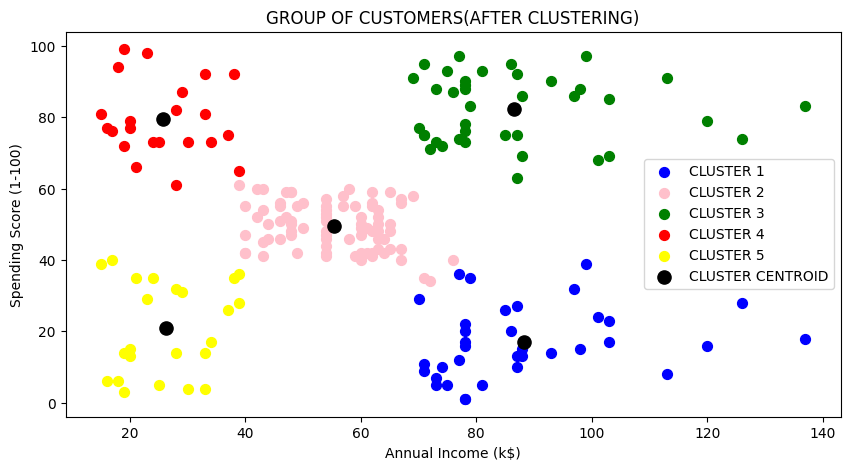

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(X[Y==0,0],X[Y==0,1],c='blue',s=50,label='CLUSTER 1')
plt.scatter(X[Y==1,0],X[Y==1,1],c='pink',s=50,label='CLUSTER 2')
plt.scatter(X[Y==2,0],X[Y==2,1],c='green',s=50,label='CLUSTER 3')
plt.scatter(X[Y==3,0],X[Y==3,1],c='red',s=50,label='CLUSTER 4')
plt.scatter(X[Y==4,0],X[Y==4,1],c='yellow',s=50,label='CLUSTER 5')
plt.scatter(k_center[:,0],k_center[:,1],s=90,c='black',label='CLUSTER CENTROID')
plt.title("GROUP OF CUSTOMERS(AFTER CLUSTERING)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()